<a href="https://colab.research.google.com/github/protocol66/GoogleColabNotebooks/blob/main/DermSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import pipeline, preprocessing, svm, tree
from sklearn.multiclass import OneVsRestClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve


Read in dataset (https://archive.ics.uci.edu/ml/datasets/Dermatology)

In [ ]:
df = pd.read_csv('/content/dermatology.data', header=None)
df.columns = ['erythema',
            'scaling',
            'definite borders',
            'itching',
            'koebner phenomenon',
            'polygonal papules',
            'follicular papules',
            'oral mucosal involvement',
            'knee and elbow involvement',
            'scalp involvement',
            'family history',
            'melanin incontinence',
            'eosinophils in the infiltrate',
            'PNL infiltrate',
            'fibrosis of the papillary dermis',
            'exocytosis',
            'acanthosis',
            'hyperkeratosis',
            'parakeratosis',
            'clubbing of the rete ridges',
            'elongation of the rete ridges',
            'thinning of the suprapapillary epidermis',
            'spongiform pustule',
            'munro microabcess',
            'focal hypergranulosis',
            'disappearance of the granular layer',
            'vacuolisation and damage of basal layer',
            'spongiosis',
            'saw-tooth appearance of retes',
            'follicular horn plug',
            'perifollicular parakeratosis',
            'inflammatory monoluclear inflitrate',
            'band-like infiltrate',
            'age',
            'class']

Drop rows with missing data

In [ ]:
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

Split features and labels

In [ ]:
X = df.drop(['class'], 1).copy()
y = df['class'].copy()
X = np.array(X)
y = np.array(y)

Split training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale training data

In [ ]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Use GridSearchCV() to find best paramaters then print out paramaters. (No need to rerun if using same training data.)

In [ ]:

params = {
    'C': [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear']
}
clf = GridSearchCV(
    svm.SVC(break_ties=True, random_state=42),
    params,
    scoring='accuracy'
)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'C': 3, 'gamma': 'scale', 'kernel': 'linear'}


Train SVM with paramaters from GridSearchCV().

In [ ]:
clf_svm = OneVsRestClassifier(svm.SVC(C=3, kernel='linear', decision_function_shape='ovr', break_ties=True, random_state=42))
clf_svm.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=3, break_ties=True, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='linear', max_iter=-1,
                                  probability=False, random_state=42,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

Output paramaters to csv file

In [ ]:
cols = []
w_length = len(clf_svm.coef_[0])
for i in range(1, w_length + 1):
  cols.append('w_i_' + str(i))
cols.append('b_i')

rows = np.arange(1,7)

params = pd.DataFrame(index=rows, columns=cols)

row = 0;
for w in clf_svm.coef_:
  for i in range(0, w_length):
    params.iat[row, i] = w[i];
  row += 1;

bs = clf_svm.intercept_.tolist()
for i in range(0,len(bs)):
  bs[i] = bs[i][0]
params['b_i'] = bs

params.to_csv('/content/params.csv')
params


,w_i_1,w_i_2,w_i_3,w_i_4,w_i_5,w_i_6,w_i_7,w_i_8,w_i_9,w_i_10,w_i_11,w_i_12,w_i_13,w_i_14,w_i_15,w_i_16,w_i_17,w_i_18,w_i_19,w_i_20,w_i_21,w_i_22,w_i_23,w_i_24,w_i_25,w_i_26,w_i_27,w_i_28,w_i_29,w_i_30,w_i_31,w_i_32,w_i_33,w_i_34,b_i
1,0.082188,0.14675,0.0208296,0.059352,0.0654794,-3.81639e-17,-0.132905,-5.20417e-17,0.209917,0.119713,0.0427767,-3.1225e-17,-0.0490273,0.180639,-0.22752,-0.293427,0.0820789,0.0406098,0.0664677,0.275522,0.230965,0.498444,-0.108014,0.215235,1.73472e-18,0.108687,-3.64292e-17,-0.299487,-0.0381718,-2.68882e-17,-0.0784256,-0.0224928,-0.0366562,0.0309849,-0.484061
2,0.680624,0.384097,0.135418,1.5857,-1.37471,-0.556309,-0.379522,-0.107212,-0.455107,0.520309,-0.107181,-0.351913,0.529691,1.72669,-0.814131,0.059789,0.382774,0.0658552,-0.512696,-0.527441,-0.668941,-1.00413,-0.586356,-0.323239,-0.609331,-2.84268,-0.555844,1.16298,-0.553727,-0.075456,-0.14182,-0.222168,0.623806,-0.032788,-4.954263
3,0.0156622,-0.0399945,0.037009,0.0400953,0.011687,0.134669,-0.000199598,0.0884743,-0.00376497,-0.00536581,-0.00342416,0.158497,0.0101919,-0.0273122,-0.0394468,0.0219938,0.0201787,-0.00875677,0.036024,-0.00436538,-0.0482904,-0.00541824,0,-0.00938522,0.201643,-0.00434854,0.174502,-0.0246829,0.159955,-0.00096635,-0.000908129,0.0388998,0.139197,-0.00601533,-0.596426
4,-0.585154,-0.330014,0.105854,-1.49705,1.10116,-0.398776,-0.443062,-0.389746,-0.56094,-0.703518,-0.392148,-0.374315,-0.244747,-1.40825,-1.83766,-0.0553688,-0.527467,0.114072,0.453834,-0.798411,-1.86823,-0.802729,-0.550608,-0.490975,-0.397817,2.21645,-0.346272,-0.458084,-0.344953,-0.140349,-0.131893,0.298623,-0.343078,-0.0908393,-5.407414
5,-0.0176256,-0.115445,-0.0531055,0.0399492,-0.0868111,-0.0549372,0.0303637,-0.0617827,-0.13717,-0.0926414,-0.0214031,-0.0593366,-0.161225,-0.302954,0.761124,-0.271772,0.000894473,0.0430842,-0.0926298,-0.0784002,0.211407,-0.248734,-0.0246575,-0.0665539,-0.0601733,-0.171925,-0.0548912,-0.372295,-0.0820233,-0.034848,-0.065497,0.139487,0.0154051,0.0851353,-1.341229
6,0.0196153,0.00816988,0.0200855,-0.0351908,-0.0228378,-0.00158093,0.241331,6.93889e-18,0.169874,0.0847412,0.0520414,-0.00170753,-0.00494607,0.00342501,-0.0894348,-0.0533134,-0.0863114,-0.0632633,0.0367191,-0.0614991,-0.132077,-0.0532458,-0.0189611,-0.058407,-0.00173161,-0.0220707,-0.00105307,-0.00777576,-0.00157359,0.101522,0.291603,-0.046742,0.046795,-0.0961571,-1.253175


Accuracy Score

In [ ]:
pred = clf_svm.predict(X_test)
# print(pred)
print(accuracy_score(y_test, pred))

0.9722222222222222


Plot Confusion Matrix

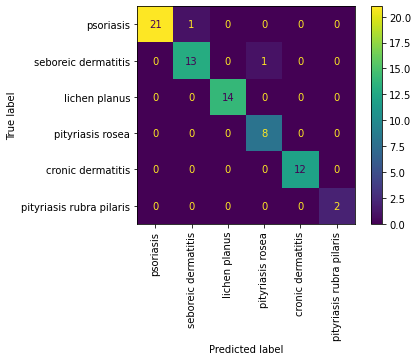

In [ ]:
plot_confusion_matrix(clf_svm, X_test, y_test, values_format='d', display_labels=['psoriasis', 'seboreic dermatitis', 'lichen planus', 'pityriasis rosea', 'cronic dermatitis', 'pityriasis rubra pilaris'], xticks_rotation='vertical')